## 2D Random Walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from rrng import GeneratorLCGReversible

%matplotlib inline

In [2]:
rng_x = GeneratorLCGReversible(3)
rng_y = GeneratorLCGReversible(9)

In [3]:
n = 10
rx = rng_x.random(size=n, update=False) / rng_x.max
ry = rng_y.random(size=n, update=False) / rng_y.max
np.vstack([rx, ry]).T

array([[0.22642041, 0.3664266 ],
       [0.64964962, 0.54215381],
       [0.46886307, 0.98529593],
       [0.69231553, 0.47208177],
       [0.23818331, 0.18004674],
       [0.75962916, 0.03544896],
       [0.00717077, 0.7050709 ],
       [0.96859821, 0.48187696],
       [0.10718244, 0.39037309],
       [0.40432977, 0.42667883]])

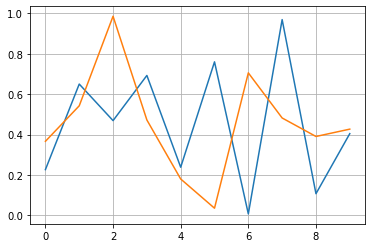

In [4]:
plt.plot(rx)
plt.plot(ry)
plt.grid()
plt.show()

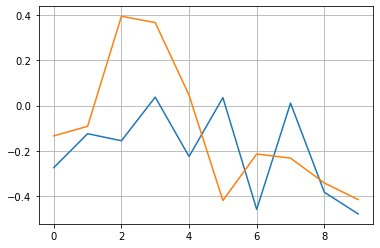

In [5]:
zx_int = (rx - 0.5).cumsum()
zy_int = (ry - 0.5).cumsum()

plt.plot(zx_int)
plt.plot(zy_int)
plt.grid()
plt.show()

In [6]:
z = np.zeros((n, n))
z[:, 0] = zx_int
z[0, :] = zy_int

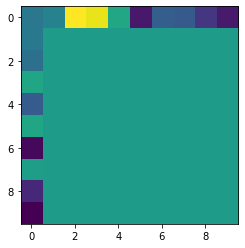

In [7]:
plt.imshow(z)

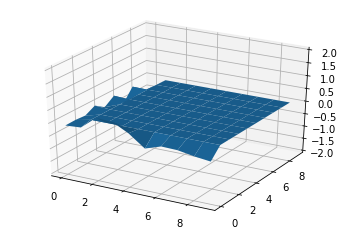

In [8]:
def show_surface_plot(z, zlim=(-2, 2), kind='surface', fig=None):

    # Axes3D.plot_wireframe(X, Y, Z, *args, **kwargs)
    X, Y = np.meshgrid(range(z.shape[0]), range(z.shape[1]))

    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if kind == 'surface':
        ax.plot_surface(X, Y, z)
    elif kind == 'wireframe':
        ax.plot_wireframe(X, Y, z, rstride=1, cstride=1)
    ax.set_zlim(*zlim)

    return ax

show_surface_plot(z)
plt.show()

In [9]:
def calc_diag_pt(z, xy, offset):
    di, dj = offset
    i, j = xy
    m = (z[i, j+dj] + z[i+di, j]) / 2
    return m*2 - z[i, j]

xy = (0, 0)
offset = (1, 1)
z[offset] = calc_diag_pt(z, xy, offset)
z[:3, :3]

array([[-0.1335734 , -0.0914196 ,  0.39387633],
       [-0.12392998, -0.08177617,  0.        ],
       [-0.1550669 ,  0.        ,  0.        ]])

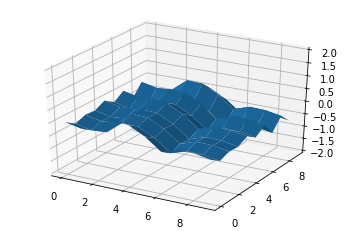

In [10]:
n = 9
z00 = 0
rng_x = GeneratorLCGReversible(3)
rng_y = GeneratorLCGReversible(9)
rx = rng_x.random(size=n, update=False) / rng_x.max
ry = rng_y.random(size=n, update=False) / rng_y.max
zx_int = (rx - 0.5).cumsum()
zy_int = (ry - 0.5).cumsum()
dz = np.zeros((n+1, n+1))
dz[1:, 0] = zx_int
dz[0, 1:] = zy_int
offset = (1, 1)
for j in range(n):
    for i in range(n):
        dz[i+1, j+1] = calc_diag_pt(dz, (i, j), offset)
show_surface_plot(z00 + dz)
plt.show()

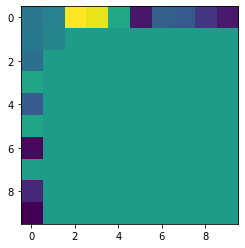

In [11]:
plt.imshow(z)
plt.show()

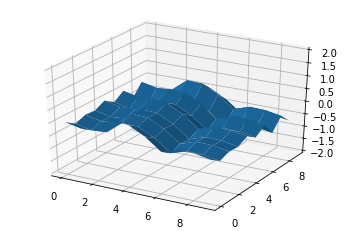

In [12]:
n = 9
z00 = 0
rng_x = GeneratorLCGReversible(3)
rng_y = GeneratorLCGReversible(9)
rx = rng_x.random(size=n, update=False) / rng_x.max
ry = rng_y.random(size=n, update=False) / rng_y.max
zx_int = (rx - 0.5).cumsum()
zy_int = (ry - 0.5).cumsum()
dz = np.zeros((n+1, n+1))
dz[1:, :] = zx_int.reshape(-1, 1)
dz[:, 1:] = dz[:, 1:] + zy_int.reshape(1, -1)
show_surface_plot(z00 + dz)
plt.show()

In [13]:
from rrng import ReversibleLCG

In [38]:
z00 = 0.0
rx00, ry00 = 100, 101
start_point = (z00, rx00, ry00)

nx, ny = 3, 3
x_states = np.zeros((nx, ny), dtype=int)
y_states = np.zeros((nx, ny), dtype=int)
x_states[0, 0] = rx00
y_states[0, 0] = ry00

print(x_states)
print(y_states)

[[100   0   0]
 [  0   0   0]
 [  0   0   0]]
[[101   0   0]
 [  0   0   0]
 [  0   0   0]]


In [39]:
rng_x = ReversibleLCG(rx00)
for i in range(1, nx):
    x_states[i, 0] = rng_x._next_state()
    y_states[i, 0] = x_states[i, 0] >> rng_x._d
    assert y_states[i, 0] == rng_x.next()

rng_y = ReversibleLCG(ry00)
for j in range(1, ny):
    y_states[0, j] = rng_y._next_state()
    x_states[0, j] = y_states[0, j] >> rng_y._d
    assert x_states[0, j] == rng_y.next()

print(x_states)
print(y_states)

[[                100          1817891166          1203774972]
 [1443646882588733155                   0                   0]
 [6872648449605131318                   0                   0]]
[[                101 7807783106435526160 5170174137060690463]
 [          336125232                   0                   0]
 [         1600163162                   0                   0]]


In [40]:
# Complete the y_states
for i in range(1, nx):
    rng_y = ReversibleLCG(y_states[i, 0])
    for j in range(1, ny):
        y_states[i, j] = rng_y._next_state()
        rng_y.next()
print(y_states)

[[                101 7807783106435526160 5170174137060690463]
 [          336125232 1050589639039070911 2299278780848745954]
 [         1600163162 2646560615692369953 5623510824592533020]]


In [41]:
# Complete the x_states
for j in range(1, ny):
    rng_x = ReversibleLCG(x_states[0, j])
    for i in range(1, nx):
        x_states[i, j] = rng_x._next_state()
        rng_x.next()
print(x_states)

[[                100          1817891166          1203774972]
 [1443646882588733155 6823549219722358997 1095301103071933083]
 [6872648449605131318 8817035101622862272 1234721608649427854]]


In [42]:
rx = (x_states >> rng_x._d) / rng_x.max
ry = (y_states >> rng_y._d) / rng_y.max
print(rx)
print(ry)

[[0.         0.         0.        ]
 [0.15652051 0.73981069 0.11875278]
 [0.74513404 0.95594486 0.13386878]]
[[0.         0.84652154 0.5605514 ]
 [0.         0.11390516 0.2492883 ]
 [0.         0.28694068 0.60970227]]


In [43]:
z = rx + ry
z[1:, 0] = z[1:, 0] * 2
z[0, 1:] = z[0, 1:] * 2
z = z - 1
z[0, 0] = 0
z

array([[ 0.        ,  0.69304308,  0.12110281],
       [-0.68695898, -0.14628415, -0.63195891],
       [ 0.49026808,  0.24288554, -0.25642895]])

In [44]:
z = z.cumsum(axis=0).cumsum(axis=1) + z00
z

array([[ 0.        ,  0.69304308,  0.81414589],
       [-0.68695898, -0.14020006, -0.65105616],
       [-0.19669091,  0.59295356, -0.1743315 ]])

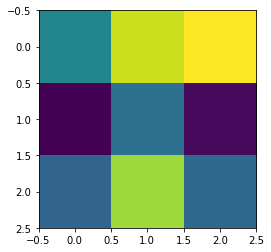

In [45]:
plt.imshow(z)
plt.show()

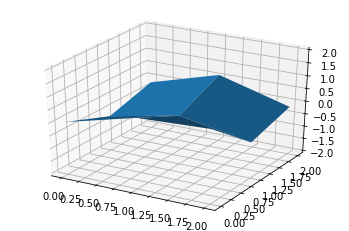

In [46]:
show_surface_plot(z)
plt.show()

In [47]:
def compute_surface(z00, rx00, ry00, nx, ny):
    x_states = np.zeros((nx, ny), dtype=int)
    y_states = np.zeros((nx, ny), dtype=int)
    x_states[0, 0] = rx00
    y_states[0, 0] = ry00
    
    rng_x = ReversibleLCG(rx00)
    for i in range(1, nx):
        x_states[i, 0] = rng_x._next_state()
        y_states[i, 0] = x_states[i, 0] >> rng_x._d
        assert y_states[i, 0] == rng_x.next()

    rng_y = ReversibleLCG(ry00)
    for j in range(1, ny):
        y_states[0, j] = rng_y._next_state()
        x_states[0, j] = y_states[0, j] >> rng_y._d
        assert x_states[0, j] == rng_y.next()
    
    # Complete the y_states
    for i in range(1, nx):
        rng_y = ReversibleLCG(y_states[i, 0])
        for j in range(1, ny):
            y_states[i, j] = rng_y._next_state()
            rng_y.next()

    # Complete the x_states
    for j in range(1, ny):
        rng_x = ReversibleLCG(x_states[0, j])
        for i in range(1, nx):
            x_states[i, j] = rng_x._next_state()
            rng_x.next()
    
    rx = (x_states >> rng_x._d) / rng_x.max
    ry = (y_states >> rng_y._d) / rng_y.max
    
    z = rx + ry
    z[1:, 0] = z[1:, 0] * 2
    z[0, 1:] = z[0, 1:] * 2
    z = z - 1
    z[0, 0] = 0
    z = z.cumsum(axis=0).cumsum(axis=1) + z00
    
    return z


In [48]:
z00 = 0
rx00, ry00 = 100, 101
nx, ny = 3, 3

z = compute_surface(z00, rx00, ry00, nx, ny)
z

array([[ 0.        ,  0.69304308,  0.81414589],
       [-0.68695898, -0.14020006, -0.65105616],
       [-0.19669091,  0.59295356, -0.1743315 ]])

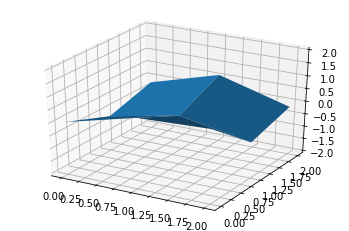

In [49]:
show_surface_plot(z)
plt.show()

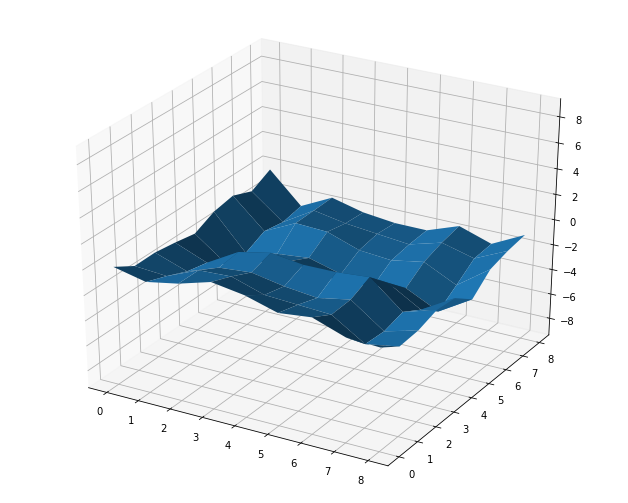

In [50]:
z00 = 0
rx00, ry00 = 1635293, 9924078
nx, ny = 9, 9
z = compute_surface(z00, rx00, ry00, nx, ny)

fig = plt.figure(figsize=(11, 9))
show_surface_plot(z, fig=fig, zlim=(-nx, ny))
plt.show()

In [51]:
z.min(), z.max(), z.mean()

(-4.542167312252412, 0.6481733869985555, -1.686128752941797)

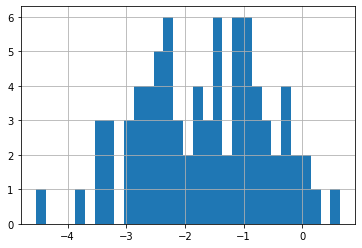

In [52]:
plt.hist(z.ravel(), bins=31)
plt.grid()
plt.show()